## This is the softmax workbook for ECE C147/C247 Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

The goal of this workbook is to give you experience with training a softmax classifier.

In [1]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'C:/Users/User/Desktop/EE247/HW2_Code/hw2_Questions/data/cifar-10-batches-py' # You need to update this line
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [3]:
from nndl import Softmax

In [4]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [5]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

loss = softmax.loss(X_train, y_train)

In [6]:
print(loss)

2.3277607028048757


## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this make sense?

## Answer:

This makes sense because our weight is randomly intiallized. It is no different from making a random prediction from the 10 classes, which is why our initial scores are evenly distributed across the 10 classes. As a result, if we plug these scores into the softmax loss function: $$ L_{\Theta} = −\frac{1}{M}\sum_{i=1}^{M}\log(\frac{e^{W_{y(i)}^Tx(i) + b_{y(i)}}}{\sum_{j=1}^{c}e^{W_{j}^Tx(j) + b_j}}) \approx −log(\frac{1}{10}) \approx 2.30258509$$

It's close to 2.3.

#### Softmax gradient

In [7]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1953.33it/s]

numerical: 0.748466 analytic: 0.748466, relative error: 1.147876e-09
numerical: 0.655100 analytic: 0.655100, relative error: 1.911980e-08
numerical: 0.290715 analytic: 0.290715, relative error: 3.430144e-08
numerical: 0.025306 analytic: 0.025306, relative error: 1.004345e-06
numerical: 0.590186 analytic: 0.590186, relative error: 4.540223e-08
numerical: 1.854029 analytic: 1.854029, relative error: 8.706384e-09
numerical: -2.489010 analytic: -2.489010, relative error: 2.169692e-08
numerical: -2.607978 analytic: -2.607978, relative error: 6.218801e-09
numerical: 1.533928 analytic: 1.533928, relative error: 6.156722e-09
numerical: -4.615755 analytic: -4.615755, relative error: 7.355396e-09


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [8]:
import time

In [9]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1968.76it/s]

Normal loss / grad_norm: 2.331676097115445 / 333.3972385007976 computed in 0.25699782371520996s
Vectorized loss / grad: 2.331676097115445 / 333.3972385007976 computed in 0.0070035457611083984s
difference in loss / grad: 0.0 /2.2278613260596803e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

  1%|█▏                                                                             | 22/1500 [00:00<00:06, 220.00it/s]

iteration 0 / 1500: loss 2.3365926606637544


  9%|███████▎                                                                      | 141/1500 [00:00<00:05, 239.90it/s]

iteration 100 / 1500: loss 2.0557222613850827


 16%|████████████▋                                                                 | 245/1500 [00:01<00:05, 242.99it/s]

iteration 200 / 1500: loss 2.0357745120662813


 21%|████████████████▋                                                             | 321/1500 [00:01<00:05, 234.49it/s]

iteration 300 / 1500: loss 1.9813348165609888


 29%|██████████████████████▊                                                       | 439/1500 [00:01<00:04, 223.38it/s]

iteration 400 / 1500: loss 1.9583142443981612


 36%|███████████████████████████▋                                                  | 533/1500 [00:02<00:04, 230.45it/s]

iteration 500 / 1500: loss 1.8622653073541355


 42%|████████████████████████████████▊                                             | 632/1500 [00:02<00:03, 239.72it/s]

iteration 600 / 1500: loss 1.8532611454359382


 49%|██████████████████████████████████████▍                                       | 739/1500 [00:03<00:02, 256.69it/s]

iteration 700 / 1500: loss 1.8353062223725827


 56%|███████████████████████████████████████████▋                                  | 841/1500 [00:03<00:02, 239.48it/s]

iteration 800 / 1500: loss 1.829389246882764


 63%|█████████████████████████████████████████████████                             | 944/1500 [00:04<00:02, 248.15it/s]

iteration 900 / 1500: loss 1.8992158530357484


 70%|█████████████████████████████████████████████████████▊                       | 1048/1500 [00:04<00:01, 241.82it/s]

iteration 1000 / 1500: loss 1.9783503540252303


 77%|██████████████████████████████████████████████████████████▉                  | 1149/1500 [00:04<00:01, 240.39it/s]

iteration 1100 / 1500: loss 1.8470797913532633


 82%|███████████████████████████████████████████████████████████████              | 1229/1500 [00:05<00:01, 254.95it/s]

iteration 1200 / 1500: loss 1.8411450268664082


 89%|████████████████████████████████████████████████████████████████████▎        | 1331/1500 [00:05<00:00, 237.61it/s]

iteration 1300 / 1500: loss 1.7910402495792102


 96%|█████████████████████████████████████████████████████████████████████████▋   | 1435/1500 [00:06<00:00, 249.36it/s]

iteration 1400 / 1500: loss 1.8705803029382257


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 239.73it/s]


That took 6.259000301361084s


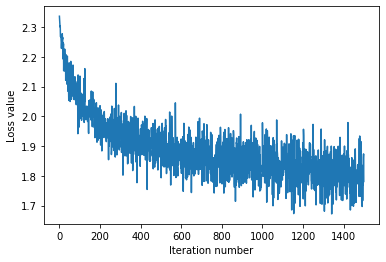

In [10]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [11]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.3811428571428571
validation accuracy: 0.398


## Optimize the softmax classifier

In [12]:
np.finfo(float).eps

2.220446049250313e-16


  0%|                                                                                         | 0/1500 [00:00<?, ?it/s]

iteration 0 / 1500: loss 2.3353835450891545


C:\Users\User\Desktop\EE247\HW2_Code\hw2_Questions\code\nndl\softmax.py:145: RuntimeWarning: overflow encountered in exp
  all_score = np.log(np.sum(np.exp(softmax_scores), axis=1))-true_scores
C:\Users\User\Desktop\EE247\HW2_Code\hw2_Questions\code\nndl\softmax.py:151: RuntimeWarning: overflow encountered in exp
  grad_ = np.divide(np.exp(np.matmul(self.W, X.T)), np.sum(np.exp(np.matmul(self.W, X.T)), axis=0))
C:\Users\User\Desktop\EE247\HW2_Code\hw2_Questions\code\nndl\softmax.py:151: RuntimeWarning: invalid value encountered in true_divide
  grad_ = np.divide(np.exp(np.matmul(self.W, X.T)), np.sum(np.exp(np.matmul(self.W, X.T)), axis=0))
  9%|███████▍                                                                      | 142/1500 [00:00<00:05, 229.35it/s]

iteration 100 / 1500: loss nan


 16%|████████████▎                                                                 | 236/1500 [00:01<00:05, 212.74it/s]

iteration 200 / 1500: loss nan


 22%|█████████████████▏                                                            | 331/1500 [00:01<00:05, 229.81it/s]

iteration 300 / 1500: loss nan


 29%|██████████████████████▍                                                       | 431/1500 [00:01<00:04, 239.31it/s]

iteration 400 / 1500: loss nan


 36%|███████████████████████████▉                                                  | 538/1500 [00:02<00:03, 254.80it/s]

iteration 500 / 1500: loss nan


 42%|█████████████████████████████████                                             | 636/1500 [00:02<00:03, 224.35it/s]

iteration 600 / 1500: loss nan


 49%|██████████████████████████████████████▍                                       | 738/1500 [00:03<00:03, 243.21it/s]

iteration 700 / 1500: loss nan


 54%|██████████████████████████████████████████▍                                   | 816/1500 [00:03<00:02, 251.32it/s]

iteration 800 / 1500: loss nan


 62%|████████████████████████████████████████████████▏                             | 927/1500 [00:04<00:03, 188.49it/s]

iteration 900 / 1500: loss nan


 68%|████████████████████████████████████████████████████▍                        | 1021/1500 [00:04<00:02, 220.30it/s]

iteration 1000 / 1500: loss nan


 76%|██████████████████████████████████████████████████████████▎                  | 1135/1500 [00:05<00:01, 216.86it/s]

iteration 1100 / 1500: loss nan


 82%|███████████████████████████████████████████████████████████████▍             | 1237/1500 [00:05<00:01, 242.17it/s]

iteration 1200 / 1500: loss nan


 89%|████████████████████████████████████████████████████████████████████▏        | 1328/1500 [00:05<00:00, 204.84it/s]

iteration 1300 / 1500: loss nan


 95%|█████████████████████████████████████████████████████████████████████████▎   | 1427/1500 [00:06<00:00, 235.78it/s]

iteration 1400 / 1500: loss nan


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 223.25it/s]

That took 6.72200083732605s


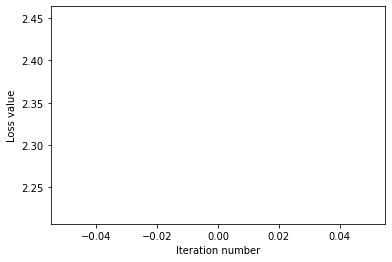

training accuracy: 0.10026530612244898
validation accuracy: 0.087


  3%|██▌                                                                            | 48/1500 [00:00<00:06, 237.85it/s]

iteration 0 / 1500: loss 2.4615346985497166


  8%|██████▍                                                                       | 124/1500 [00:00<00:06, 228.41it/s]

iteration 100 / 1500: loss 28.333379080471175


 16%|████████████▎                                                                 | 236/1500 [00:01<00:06, 209.54it/s]

iteration 200 / 1500: loss 44.467116668405716


 23%|█████████████████▌                                                            | 338/1500 [00:01<00:04, 242.22it/s]

iteration 300 / 1500: loss 30.121347387504283


 29%|██████████████████████▉                                                       | 440/1500 [00:01<00:04, 241.02it/s]

iteration 400 / 1500: loss 26.65671169362472


 36%|████████████████████████████▏                                                 | 543/1500 [00:02<00:03, 246.26it/s]

iteration 500 / 1500: loss 29.871015294984183


 43%|█████████████████████████████████▍                                            | 643/1500 [00:02<00:03, 233.93it/s]

iteration 600 / 1500: loss 25.05655491168399


 50%|██████████████████████████████████████▋                                       | 745/1500 [00:03<00:03, 239.28it/s]

iteration 700 / 1500: loss 28.213828424279914


 56%|███████████████████████████████████████████▉                                  | 845/1500 [00:03<00:02, 235.26it/s]

iteration 800 / 1500: loss 26.455162324427256


 63%|█████████████████████████████████████████████████▏                            | 946/1500 [00:04<00:02, 242.96it/s]

iteration 900 / 1500: loss 32.63925656068801


 70%|█████████████████████████████████████████████████████▌                       | 1044/1500 [00:04<00:01, 229.65it/s]

iteration 1000 / 1500: loss 27.48861483969415


 76%|██████████████████████████████████████████████████████████▋                  | 1143/1500 [00:04<00:01, 237.28it/s]

iteration 1100 / 1500: loss 32.170042270825654


 83%|███████████████████████████████████████████████████████████████▋             | 1241/1500 [00:05<00:01, 239.12it/s]

iteration 1200 / 1500: loss 37.02528923306888


 89%|████████████████████████████████████████████████████████████████████▋        | 1338/1500 [00:05<00:00, 218.44it/s]

iteration 1300 / 1500: loss 39.957702753376324


 96%|█████████████████████████████████████████████████████████████████████████▊   | 1437/1500 [00:06<00:00, 236.60it/s]

iteration 1400 / 1500: loss 42.899605058729776


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 232.56it/s]


That took 6.451997756958008s


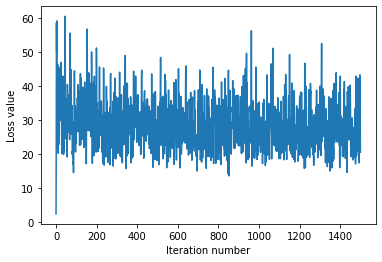

training accuracy: 0.2930204081632653
validation accuracy: 0.281


  1%|█                                                                              | 19/1500 [00:00<00:07, 186.28it/s]

iteration 0 / 1500: loss 2.3790388831757823


 10%|███████▍                                                                      | 143/1500 [00:00<00:05, 242.51it/s]

iteration 100 / 1500: loss nan


 15%|███████████▌                                                                  | 222/1500 [00:00<00:05, 234.01it/s]

iteration 200 / 1500: loss nan


 23%|█████████████████▊                                                            | 343/1500 [00:01<00:04, 234.13it/s]

iteration 300 / 1500: loss nan


 28%|█████████████████████▉                                                        | 421/1500 [00:01<00:04, 248.57it/s]

iteration 400 / 1500: loss nan


 36%|████████████████████████████▎                                                 | 545/1500 [00:02<00:04, 236.11it/s]

iteration 500 / 1500: loss nan


 42%|█████████████████████████████████                                             | 637/1500 [00:02<00:04, 212.64it/s]

iteration 600 / 1500: loss nan


 49%|██████████████████████████████████████                                        | 732/1500 [00:03<00:03, 231.43it/s]

iteration 700 / 1500: loss nan


 55%|███████████████████████████████████████████▏                                  | 831/1500 [00:03<00:02, 235.55it/s]

iteration 800 / 1500: loss nan


 62%|████████████████████████████████████████████████▍                             | 931/1500 [00:04<00:02, 233.59it/s]

iteration 900 / 1500: loss nan


 69%|████████████████████████████████████████████████████▊                        | 1028/1500 [00:04<00:02, 227.03it/s]

iteration 1000 / 1500: loss nan


 75%|█████████████████████████████████████████████████████████▊                   | 1127/1500 [00:04<00:01, 239.53it/s]

iteration 1100 / 1500: loss nan


 82%|███████████████████████████████████████████████████████████████              | 1229/1500 [00:05<00:01, 244.59it/s]

iteration 1200 / 1500: loss nan


 89%|████████████████████████████████████████████████████████████████████▏        | 1329/1500 [00:05<00:00, 221.54it/s]

iteration 1300 / 1500: loss nan


 95%|█████████████████████████████████████████████████████████████████████████▎   | 1427/1500 [00:06<00:00, 233.05it/s]

iteration 1400 / 1500: loss nan


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 232.41it/s]

That took 6.456999063491821s


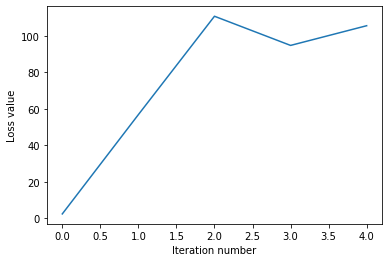

training accuracy: 0.10026530612244898
validation accuracy: 0.087


  3%|██▏                                                                            | 41/1500 [00:00<00:07, 204.05it/s]

iteration 0 / 1500: loss 2.338799247622096


  9%|███████▏                                                                      | 139/1500 [00:00<00:05, 239.37it/s]

iteration 100 / 1500: loss 2.3741638193976007


 16%|████████████▎                                                                 | 236/1500 [00:01<00:05, 233.56it/s]

iteration 200 / 1500: loss 3.986164950939759


 22%|█████████████████▎                                                            | 332/1500 [00:01<00:05, 229.84it/s]

iteration 300 / 1500: loss 2.9911038436545003


 29%|██████████████████████▋                                                       | 436/1500 [00:01<00:04, 250.05it/s]

iteration 400 / 1500: loss 2.2226778474682676


 36%|████████████████████████████                                                  | 539/1500 [00:02<00:04, 228.03it/s]

iteration 500 / 1500: loss 3.4665937843255636


 42%|█████████████████████████████████                                             | 637/1500 [00:02<00:03, 239.94it/s]

iteration 600 / 1500: loss 3.9698696636064796


 49%|██████████████████████████████████████▎                                       | 737/1500 [00:03<00:03, 241.03it/s]

iteration 700 / 1500: loss 2.3364296345441784


 56%|███████████████████████████████████████████▎                                  | 834/1500 [00:03<00:02, 233.28it/s]

iteration 800 / 1500: loss 3.052528247098768


 62%|████████████████████████████████████████████████▋                             | 937/1500 [00:03<00:02, 247.81it/s]

iteration 900 / 1500: loss 2.3747833366348776


 69%|█████████████████████████████████████████████████████▏                       | 1037/1500 [00:04<00:02, 228.62it/s]

iteration 1000 / 1500: loss 2.286946186499525


 76%|██████████████████████████████████████████████████████████▎                  | 1135/1500 [00:04<00:01, 234.57it/s]

iteration 1100 / 1500: loss 2.5187840731040905


 82%|██████████████████████████████████████████████████████████████▉              | 1227/1500 [00:05<00:01, 218.08it/s]

iteration 1200 / 1500: loss 2.971672432981369


 88%|████████████████████████████████████████████████████████████████████         | 1325/1500 [00:05<00:00, 224.04it/s]

iteration 1300 / 1500: loss 2.4157320985896233


 95%|█████████████████████████████████████████████████████████████████████████▎   | 1427/1500 [00:06<00:00, 243.41it/s]

iteration 1400 / 1500: loss 2.6727410576732864


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 230.13it/s]


That took 6.521001100540161s


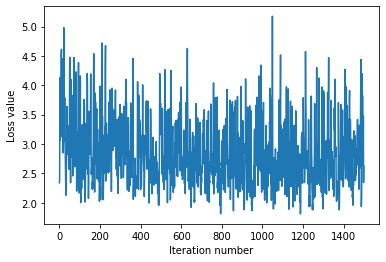

training accuracy: 0.2886734693877551
validation accuracy: 0.288


  1%|█▏                                                                             | 22/1500 [00:00<00:06, 215.69it/s]

iteration 0 / 1500: loss 2.372474398135772


 10%|███████▋                                                                      | 149/1500 [00:00<00:05, 238.98it/s]

iteration 100 / 1500: loss 13.897071933368801


 17%|█████████████                                                                 | 251/1500 [00:01<00:05, 246.92it/s]

iteration 200 / 1500: loss 13.241459651160735


 22%|████████████████▉                                                             | 326/1500 [00:01<00:05, 232.51it/s]

iteration 300 / 1500: loss 17.95197875661463


 30%|███████████████████████▍                                                      | 451/1500 [00:01<00:04, 244.43it/s]

iteration 400 / 1500: loss 16.513838645503494


 35%|███████████████████████████▍                                                  | 527/1500 [00:02<00:04, 237.34it/s]

iteration 500 / 1500: loss 13.05491071755


 44%|█████████████████████████████████▉                                            | 653/1500 [00:02<00:03, 244.65it/s]

iteration 600 / 1500: loss 11.76007111101514


 49%|█████████████████████████████████████▉                                        | 730/1500 [00:03<00:03, 250.68it/s]

iteration 700 / 1500: loss 8.85100209452067


 55%|███████████████████████████████████████████▎                                  | 832/1500 [00:03<00:03, 221.20it/s]

iteration 800 / 1500: loss 9.024660329072722


 62%|████████████████████████████████████████████████▌                             | 935/1500 [00:03<00:02, 243.92it/s]

iteration 900 / 1500: loss 14.342883785765649


 69%|█████████████████████████████████████████████████████▏                       | 1036/1500 [00:04<00:02, 223.63it/s]

iteration 1000 / 1500: loss 16.167245583163112


 76%|██████████████████████████████████████████████████████████▏                  | 1133/1500 [00:04<00:01, 227.63it/s]

iteration 1100 / 1500: loss 11.086608563042825


 82%|███████████████████████████████████████████████████████████████▎             | 1234/1500 [00:05<00:01, 243.47it/s]

iteration 1200 / 1500: loss 16.522346197676306


 89%|████████████████████████████████████████████████████████████████████▍        | 1332/1500 [00:05<00:00, 224.76it/s]

iteration 1300 / 1500: loss 12.822429696970728


 95%|█████████████████████████████████████████████████████████████████████████▌   | 1432/1500 [00:06<00:00, 240.56it/s]

iteration 1400 / 1500: loss 12.195772866338547


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 234.41it/s]

That took 6.402997970581055s


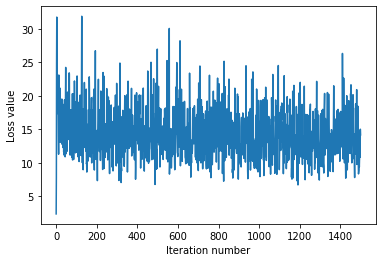

training accuracy: 0.30583673469387757
validation accuracy: 0.284


  1%|█▏                                                                             | 22/1500 [00:00<00:06, 217.82it/s]

iteration 0 / 1500: loss 2.352610559430411


 10%|███████▋                                                                      | 148/1500 [00:00<00:05, 241.24it/s]

iteration 100 / 1500: loss 1.8923521357155466


 16%|████████████▊                                                                 | 246/1500 [00:01<00:05, 237.20it/s]

iteration 200 / 1500: loss 1.885593486312816


 23%|█████████████████▉                                                            | 345/1500 [00:01<00:04, 243.55it/s]

iteration 300 / 1500: loss 1.7045096526258607


 30%|███████████████████████                                                       | 444/1500 [00:01<00:04, 225.94it/s]

iteration 400 / 1500: loss 1.6173224084287392


 36%|████████████████████████████                                                  | 540/1500 [00:02<00:04, 227.98it/s]

iteration 500 / 1500: loss 1.869431356286612


 42%|████████████████████████████████▋                                             | 628/1500 [00:02<00:04, 201.96it/s]

iteration 600 / 1500: loss 1.7657805731100182


 48%|█████████████████████████████████████▌                                        | 723/1500 [00:03<00:03, 226.12it/s]

iteration 700 / 1500: loss 1.7357334850225437


 54%|██████████████████████████████████████████▍                                   | 816/1500 [00:03<00:03, 206.00it/s]

iteration 800 / 1500: loss 1.7927984357943871


 63%|█████████████████████████████████████████████████▏                            | 946/1500 [00:04<00:02, 213.11it/s]

iteration 900 / 1500: loss 1.7305677909021744


 69%|█████████████████████████████████████████████████████▎                       | 1039/1500 [00:04<00:02, 220.57it/s]

iteration 1000 / 1500: loss 1.7201312704775944


 75%|██████████████████████████████████████████████████████████                   | 1130/1500 [00:05<00:01, 218.59it/s]

iteration 1100 / 1500: loss 1.6376163715831091


 82%|██████████████████████████████████████████████████████████████▊              | 1224/1500 [00:05<00:01, 229.76it/s]

iteration 1200 / 1500: loss 1.792025354690927


 89%|████████████████████████████████████████████████████████████████████▋        | 1339/1500 [00:06<00:00, 218.01it/s]

iteration 1300 / 1500: loss 1.7594356481750788


 95%|█████████████████████████████████████████████████████████████████████████▎   | 1428/1500 [00:06<00:00, 214.88it/s]

iteration 1400 / 1500: loss 1.7379950131523725


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 218.37it/s]


That took 6.871999025344849s


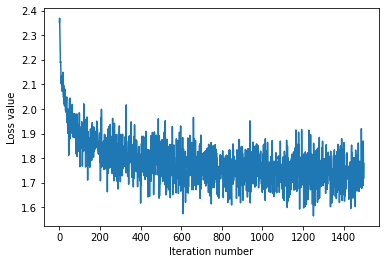

training accuracy: 0.4083469387755102
validation accuracy: 0.394


  2%|█▏                                                                             | 23/1500 [00:00<00:06, 223.30it/s]

iteration 0 / 1500: loss 2.3704882876562903


  9%|██████▉                                                                       | 134/1500 [00:00<00:06, 196.90it/s]

iteration 100 / 1500: loss 1.9615720278025612


 15%|███████████▌                                                                  | 222/1500 [00:01<00:06, 210.76it/s]

iteration 200 / 1500: loss 1.966157039029589


 23%|█████████████████▊                                                            | 342/1500 [00:01<00:05, 220.88it/s]

iteration 300 / 1500: loss 1.893061028904175


 29%|██████████████████████▌                                                       | 434/1500 [00:02<00:04, 220.89it/s]

iteration 400 / 1500: loss 1.9193743432735466


 35%|███████████████████████████▍                                                  | 528/1500 [00:02<00:04, 224.85it/s]

iteration 500 / 1500: loss 1.8489336263191047


 41%|████████████████████████████████▎                                             | 621/1500 [00:02<00:03, 220.41it/s]

iteration 600 / 1500: loss 1.7616429389971195


 49%|██████████████████████████████████████▌                                       | 741/1500 [00:03<00:03, 231.66it/s]

iteration 700 / 1500: loss 1.9389588615682165


 56%|███████████████████████████████████████████▍                                  | 835/1500 [00:03<00:03, 219.54it/s]

iteration 800 / 1500: loss 1.8212064159430719


 62%|████████████████████████████████████████████████▏                             | 926/1500 [00:04<00:02, 220.22it/s]

iteration 900 / 1500: loss 1.8434593580954894


 69%|█████████████████████████████████████████████████████▍                       | 1041/1500 [00:04<00:02, 210.51it/s]

iteration 1000 / 1500: loss 1.8234126964890527


 75%|██████████████████████████████████████████████████████████                   | 1130/1500 [00:05<00:01, 216.62it/s]

iteration 1100 / 1500: loss 1.6828502030460524


 82%|██████████████████████████████████████████████████████████████▊              | 1224/1500 [00:05<00:01, 220.79it/s]

iteration 1200 / 1500: loss 1.795181692912701


 90%|████████████████████████████████████████████████████████████████████▉        | 1343/1500 [00:06<00:00, 231.76it/s]

iteration 1300 / 1500: loss 1.7686206743770954


 96%|█████████████████████████████████████████████████████████████████████████▊   | 1438/1500 [00:06<00:00, 227.13it/s]

iteration 1400 / 1500: loss 1.8648584004789652


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 219.07it/s]

That took 6.849001407623291s


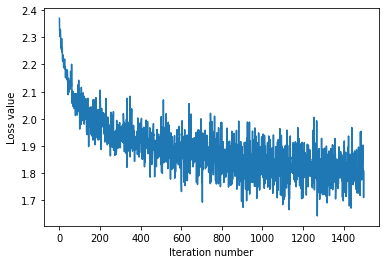

training accuracy: 0.38210204081632654
validation accuracy: 0.382


  1%|█                                                                              | 20/1500 [00:00<00:07, 200.00it/s]

iteration 0 / 1500: loss 2.327719807960521


 10%|███████▊                                                                      | 150/1500 [00:00<00:06, 217.16it/s]

iteration 100 / 1500: loss 2.0814123988651416


 15%|███████████▍                                                                  | 220/1500 [00:01<00:05, 216.67it/s]

iteration 200 / 1500: loss 2.0583251558453024


 22%|█████████████████▎                                                            | 332/1500 [00:01<00:05, 209.78it/s]

iteration 300 / 1500: loss 1.9260348132158982


 30%|███████████████████████▍                                                      | 451/1500 [00:02<00:04, 231.12it/s]

iteration 400 / 1500: loss 2.0302523445811245


 35%|███████████████████████████▏                                                  | 522/1500 [00:02<00:04, 229.14it/s]

iteration 500 / 1500: loss 1.9393463560003645


 43%|█████████████████████████████████▏                                            | 639/1500 [00:02<00:03, 224.61it/s]

iteration 600 / 1500: loss 1.9694934457422946


 49%|██████████████████████████████████████                                        | 733/1500 [00:03<00:03, 227.62it/s]

iteration 700 / 1500: loss 1.8516708602453769


 56%|███████████████████████████████████████████▊                                  | 843/1500 [00:03<00:03, 204.61it/s]

iteration 800 / 1500: loss 1.9931814441122548


 62%|████████████████████████████████████████████████▌                             | 934/1500 [00:04<00:02, 219.89it/s]

iteration 900 / 1500: loss 1.875279573668774


 68%|████████████████████████████████████████████████████▋                        | 1026/1500 [00:04<00:02, 212.25it/s]

iteration 1000 / 1500: loss 1.861260906570181


 76%|██████████████████████████████████████████████████████████▉                  | 1147/1500 [00:05<00:01, 231.29it/s]

iteration 1100 / 1500: loss 1.8211231016268399


 83%|███████████████████████████████████████████████████████████████▋             | 1241/1500 [00:05<00:01, 221.89it/s]

iteration 1200 / 1500: loss 1.9104875667607737


 89%|████████████████████████████████████████████████████████████████████▌        | 1336/1500 [00:06<00:00, 224.35it/s]

iteration 1300 / 1500: loss 1.8760559325075774


 95%|█████████████████████████████████████████████████████████████████████████▍   | 1431/1500 [00:06<00:00, 221.20it/s]

iteration 1400 / 1500: loss 1.9703829123833378


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 217.93it/s]

That took 6.886999607086182s


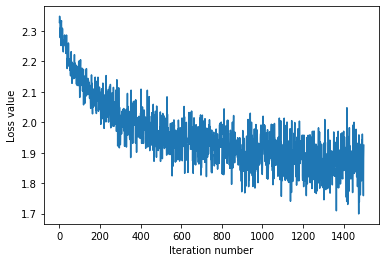

training accuracy: 0.36081632653061224
validation accuracy: 0.381


  2%|█▏                                                                             | 23/1500 [00:00<00:06, 219.05it/s]

iteration 0 / 1500: loss 2.3700514725434676


 10%|███████▍                                                                      | 143/1500 [00:00<00:05, 234.15it/s]

iteration 100 / 1500: loss 2.2948902797546786


 16%|████████████▏                                                                 | 235/1500 [00:01<00:05, 219.65it/s]

iteration 200 / 1500: loss 2.240713017937215


 23%|█████████████████▉                                                            | 346/1500 [00:01<00:05, 210.75it/s]

iteration 300 / 1500: loss 2.2154300766713093


 29%|██████████████████████▉                                                       | 441/1500 [00:02<00:04, 224.04it/s]

iteration 400 / 1500: loss 2.1397275885668647


 35%|███████████████████████████▌                                                  | 531/1500 [00:02<00:04, 211.57it/s]

iteration 500 / 1500: loss 2.182694190765592


 42%|████████████████████████████████▌                                             | 627/1500 [00:02<00:03, 227.03it/s]

iteration 600 / 1500: loss 2.123442503042313


 48%|█████████████████████████████████████▍                                        | 720/1500 [00:03<00:03, 206.43it/s]

iteration 700 / 1500: loss 2.1104598469681353


 55%|██████████████████████████████████████████▊                                   | 823/1500 [00:03<00:03, 194.98it/s]

iteration 800 / 1500: loss 2.1330386022661925


 61%|███████████████████████████████████████████████▋                              | 917/1500 [00:04<00:02, 205.07it/s]

iteration 900 / 1500: loss 2.0592562541503034


 69%|█████████████████████████████████████████████████████▏                       | 1035/1500 [00:04<00:02, 229.20it/s]

iteration 1000 / 1500: loss 2.1081171973100674


 75%|██████████████████████████████████████████████████████████                   | 1132/1500 [00:05<00:01, 231.86it/s]

iteration 1100 / 1500: loss 2.001955147869341


 83%|███████████████████████████████████████████████████████████████▊             | 1244/1500 [00:05<00:01, 215.79it/s]

iteration 1200 / 1500: loss 2.061513357632753


 89%|████████████████████████████████████████████████████████████████████▋        | 1337/1500 [00:06<00:00, 223.59it/s]

iteration 1300 / 1500: loss 2.0458751725433


 95%|████████████████████████████████████████████████████████████████████████▉    | 1421/1500 [00:06<00:00, 182.62it/s]

iteration 1400 / 1500: loss 2.024285435154474


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:07<00:00, 212.07it/s]


That took 7.074998140335083s


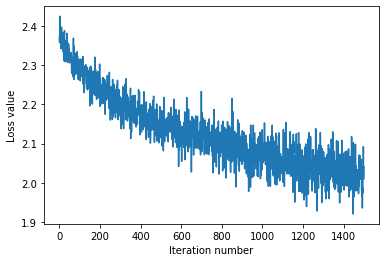

training accuracy: 0.2883469387755102
validation accuracy: 0.298


In [13]:
# ================================================================ #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #

lr_list = [1e-3, 1e-4, 3e-4, 1e-5, 5e-5, 5e-7, 1e-7, 5e-8, 1e-8]
train_pred_ls = []
val_pred_ls = []

for lr in lr_list:
    tic = time.time()
    loss_hist = softmax.train(X_train, y_train, learning_rate=lr,
                          num_iters=1500, verbose=True)
    toc = time.time()
    print('That took {}s'.format(toc - tic))

    plt.plot(loss_hist)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()
    
    y_train_pred = softmax.predict(X_train)
    print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
    train_pred_ls.append(np.mean(np.equal(y_train,y_train_pred)))
    
    y_val_pred = softmax.predict(X_val)
    print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))
    val_pred_ls.append(np.mean(np.equal(y_val,y_val_pred)))
    

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


In [14]:
print(train_pred_ls)
print(val_pred_ls)
print("Best training result when using lr=: ", lr_list[np.argmax(val_pred_ls)])

[0.10026530612244898, 0.2930204081632653, 0.10026530612244898, 0.2886734693877551, 0.30583673469387757, 0.4083469387755102, 0.38210204081632654, 0.36081632653061224, 0.2883469387755102]
[0.087, 0.281, 0.087, 0.288, 0.284, 0.394, 0.382, 0.381, 0.298]
Best training result when using lr=:  5e-07


In [15]:
loss_hist = softmax.train(X_train, y_train, learning_rate=5e-07,
                      num_iters=1500, verbose=True)

y_test_pred = softmax.predict(X_test)
print('test accuracy: {}'.format(np.mean(np.equal(y_test, y_test_pred)), ))


  0%|                                                                                         | 0/1500 [00:00<?, ?it/s]

iteration 0 / 1500: loss 2.346281546988113


  9%|██████▋                                                                       | 129/1500 [00:00<00:06, 218.96it/s]

iteration 100 / 1500: loss 1.8285350488817005


 16%|████████████▋                                                                 | 243/1500 [00:01<00:05, 216.66it/s]

iteration 200 / 1500: loss 1.8974076699053233


 22%|█████████████████▌                                                            | 337/1500 [00:01<00:05, 229.85it/s]

iteration 300 / 1500: loss 1.7764950316699921


 29%|██████████████████████▍                                                       | 432/1500 [00:02<00:04, 226.15it/s]

iteration 400 / 1500: loss 1.787830988365825


 35%|███████████████████████████▍                                                  | 528/1500 [00:02<00:04, 221.95it/s]

iteration 500 / 1500: loss 1.9631496466715332


 41%|████████████████████████████████▏                                             | 620/1500 [00:02<00:04, 211.99it/s]

iteration 600 / 1500: loss 1.8281237155120293


 49%|██████████████████████████████████████                                        | 733/1500 [00:03<00:03, 217.83it/s]

iteration 700 / 1500: loss 1.8324179773063123


 55%|██████████████████████████████████████████▉                                   | 826/1500 [00:03<00:03, 215.26it/s]

iteration 800 / 1500: loss 1.8485081197252382


 63%|█████████████████████████████████████████████████▏                            | 946/1500 [00:04<00:02, 233.40it/s]

iteration 900 / 1500: loss 1.7787622723473455


 69%|█████████████████████████████████████████████████████▍                       | 1042/1500 [00:04<00:02, 224.26it/s]

iteration 1000 / 1500: loss 1.7673749217879506


 76%|██████████████████████████████████████████████████████████▎                  | 1137/1500 [00:05<00:01, 227.38it/s]

iteration 1100 / 1500: loss 1.7690518250187772


 82%|██████████████████████████████████████████████████████████████▉              | 1225/1500 [00:05<00:01, 204.11it/s]

iteration 1200 / 1500: loss 1.7145892556896916


 89%|████████████████████████████████████████████████████████████████████▋        | 1337/1500 [00:06<00:00, 215.03it/s]

iteration 1300 / 1500: loss 1.720861529519568


 95%|█████████████████████████████████████████████████████████████████████████▎   | 1427/1500 [00:06<00:00, 201.28it/s]

iteration 1400 / 1500: loss 1.7244791752646567


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:07<00:00, 212.92it/s]

test accuracy: 0.398


In [34]:
print('CIFAR-10 test accuracy using Softmax (lr=5e-07):', np.round(np.mean(np.equal(y_test, y_test_pred)), 4)*100, "%")

CIFAR-10 test accuracy using Softmax (lr=5e-07): 39.800000000000004 %
